In [12]:
import pandas as pd 
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt 
%matplotlib inline

import calmap
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_usd = pd.read_excel('USDPEN.xlsx', 'Sheet2')

In [3]:
data = data_usd.set_index('Fecha')

In [4]:
#Transforming the data for plotting purposes
base_data = pd.DataFrame(pd.date_range(start='2010-01-01', end = '2020-02-27', freq='1D'), columns=['Fecha'])
data = base_data.join(data, on='Fecha',how='left').set_index('Fecha')
data.fillna(method='bfill', inplace=True)

In [5]:
data.shape

(3710, 1)

#### The main idea is to look between the years. Look up a pattern or shomething useful.

In [6]:
data_2020 = data.reset_index()[data.reset_index().Fecha.dt.year == 2020]
data_2019 = data.reset_index()[data.reset_index().Fecha.dt.year == 2019]
data_2018 = data.reset_index()[data.reset_index().Fecha.dt.year == 2018]
data_2017 = data.reset_index()[data.reset_index().Fecha.dt.year == 2017]
data_2016 = data.reset_index()[data.reset_index().Fecha.dt.year == 2016]
data_2015 = data.reset_index()[data.reset_index().Fecha.dt.year == 2015]
data_2014 = data.reset_index()[data.reset_index().Fecha.dt.year == 2014]
data_2013 = data.reset_index()[data.reset_index().Fecha.dt.year == 2013]
data_2012 = data.reset_index()[data.reset_index().Fecha.dt.year == 2012]
data_2011 = data.reset_index()[data.reset_index().Fecha.dt.year == 2011]
data_2010 = data.reset_index()[data.reset_index().Fecha.dt.year == 2010]

In [7]:
lista_15_10 = [data_2015.set_index('Fecha')['TC'], data_2014.set_index('Fecha')['TC'], data_2013.set_index('Fecha')['TC'], data_2012.set_index('Fecha')['TC'], data_2011.set_index('Fecha')['TC'], data_2010.set_index('Fecha')['TC']]
lista_20_15 = [data_2020.set_index('Fecha')['TC'], data_2019.set_index('Fecha')['TC'], data_2018.set_index('Fecha')['TC'], data_2017.set_index('Fecha')['TC'], data_2016.set_index('Fecha')['TC'], data_2015.set_index('Fecha')['TC']]

In [8]:
num_impares = [x for x in range(1, 6*2, 2)]
num_pares = [x for x in range(2, 7*2, 2)]
zipped_20_15 = dict(list(zip(num_impares, lista_20_15)))
zipped_15_10 = dict(list(zip(num_pares, lista_15_10)))

zipped_20_15.update(zipped_15_10) #Voy a actualziar los años, es como unir los dos dictionaries

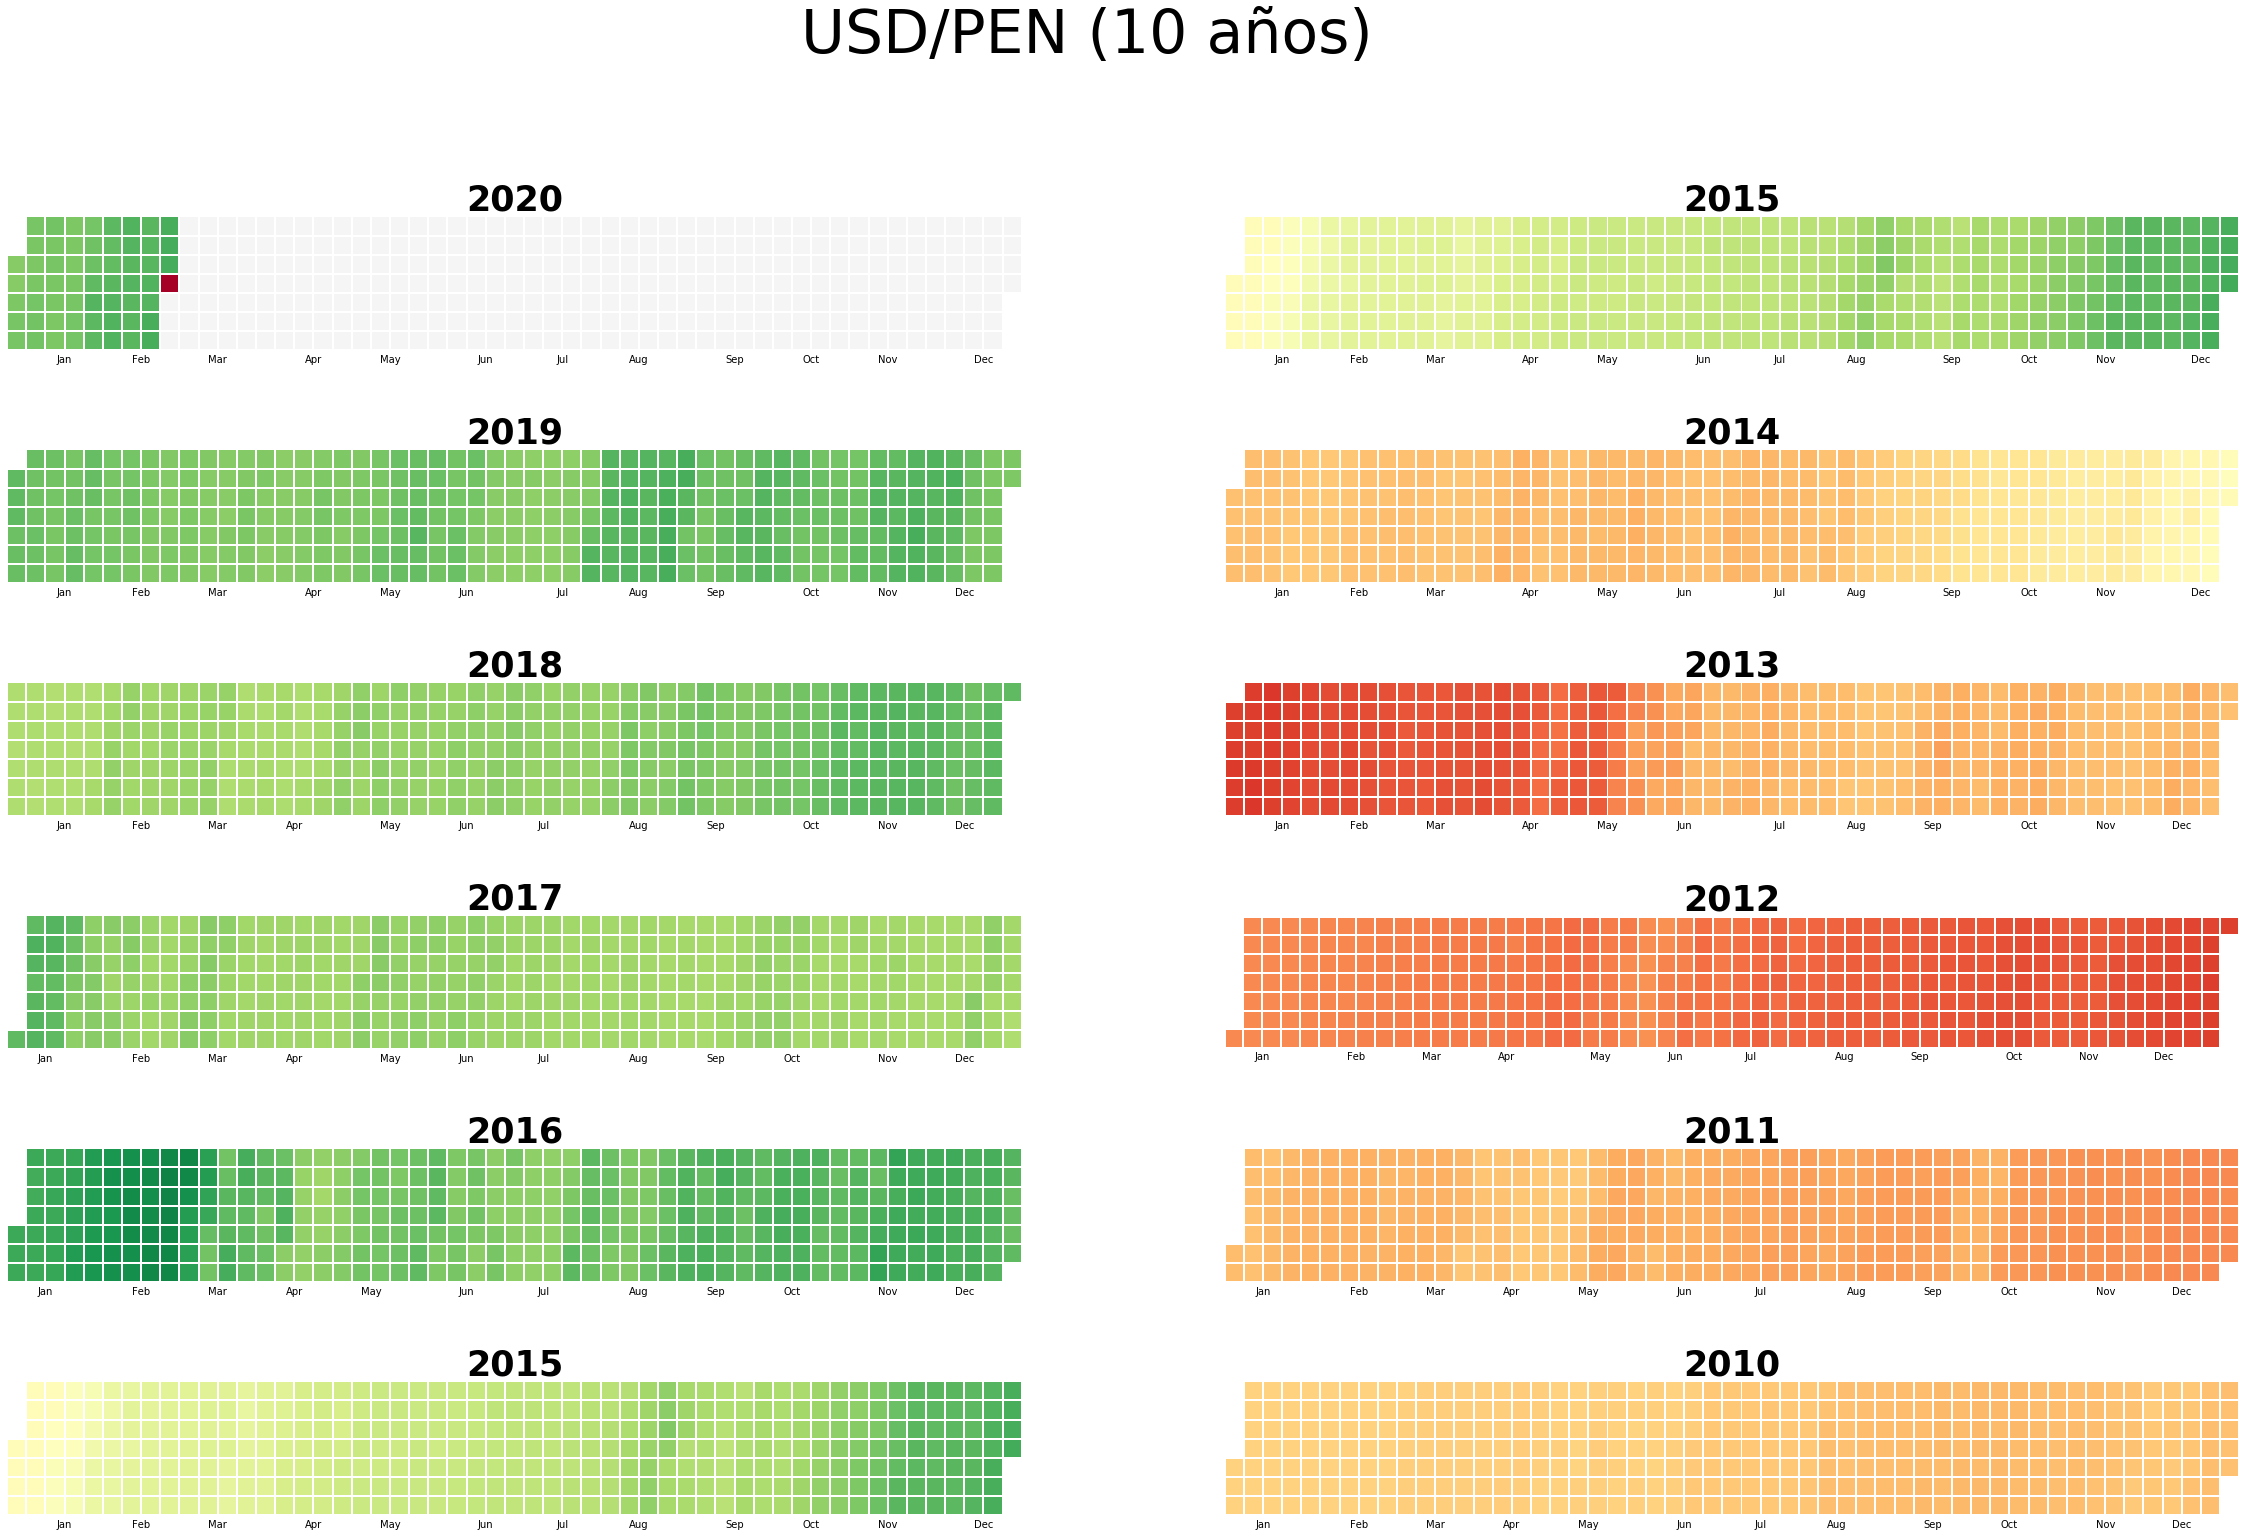

In [41]:
### value limits through 10 years

fig, axes = plt.subplots(nrows=6, ncols=2) 
axes0 = axes.T[0] #I'm just selecting column one
for df,ax in zip(lista_20_15, axes0):
    calmap.yearplot(df,ax=ax,cmap= 'RdYlGn',dayticks=[], vmin= 2.4, vmax=3.60)
    ax.set_title(df.index.year.unique()[0],fontweight="bold", size=35)

axes1 = axes.T[1] #By no, selecting column two
for df,ax in zip(lista_15_10, axes1):
    calmap.yearplot(df, ax=ax,cmap= 'RdYlGn',dayticks=[], vmin= 2.4, vmax=3.60)
    ax.set_title(df.index.year.unique()[0],fontweight="bold", size=35)
    #fig.colorbar(ax[0].get_children()[1], ax = ax.ravel().tolist()) #Idk how to add a colorbar u.u

#Fixing the shapes
fig.set_figheight(25)
fig.set_figwidth(40)
fig.suptitle('USD/PEN (10 años)', fontsize=60)

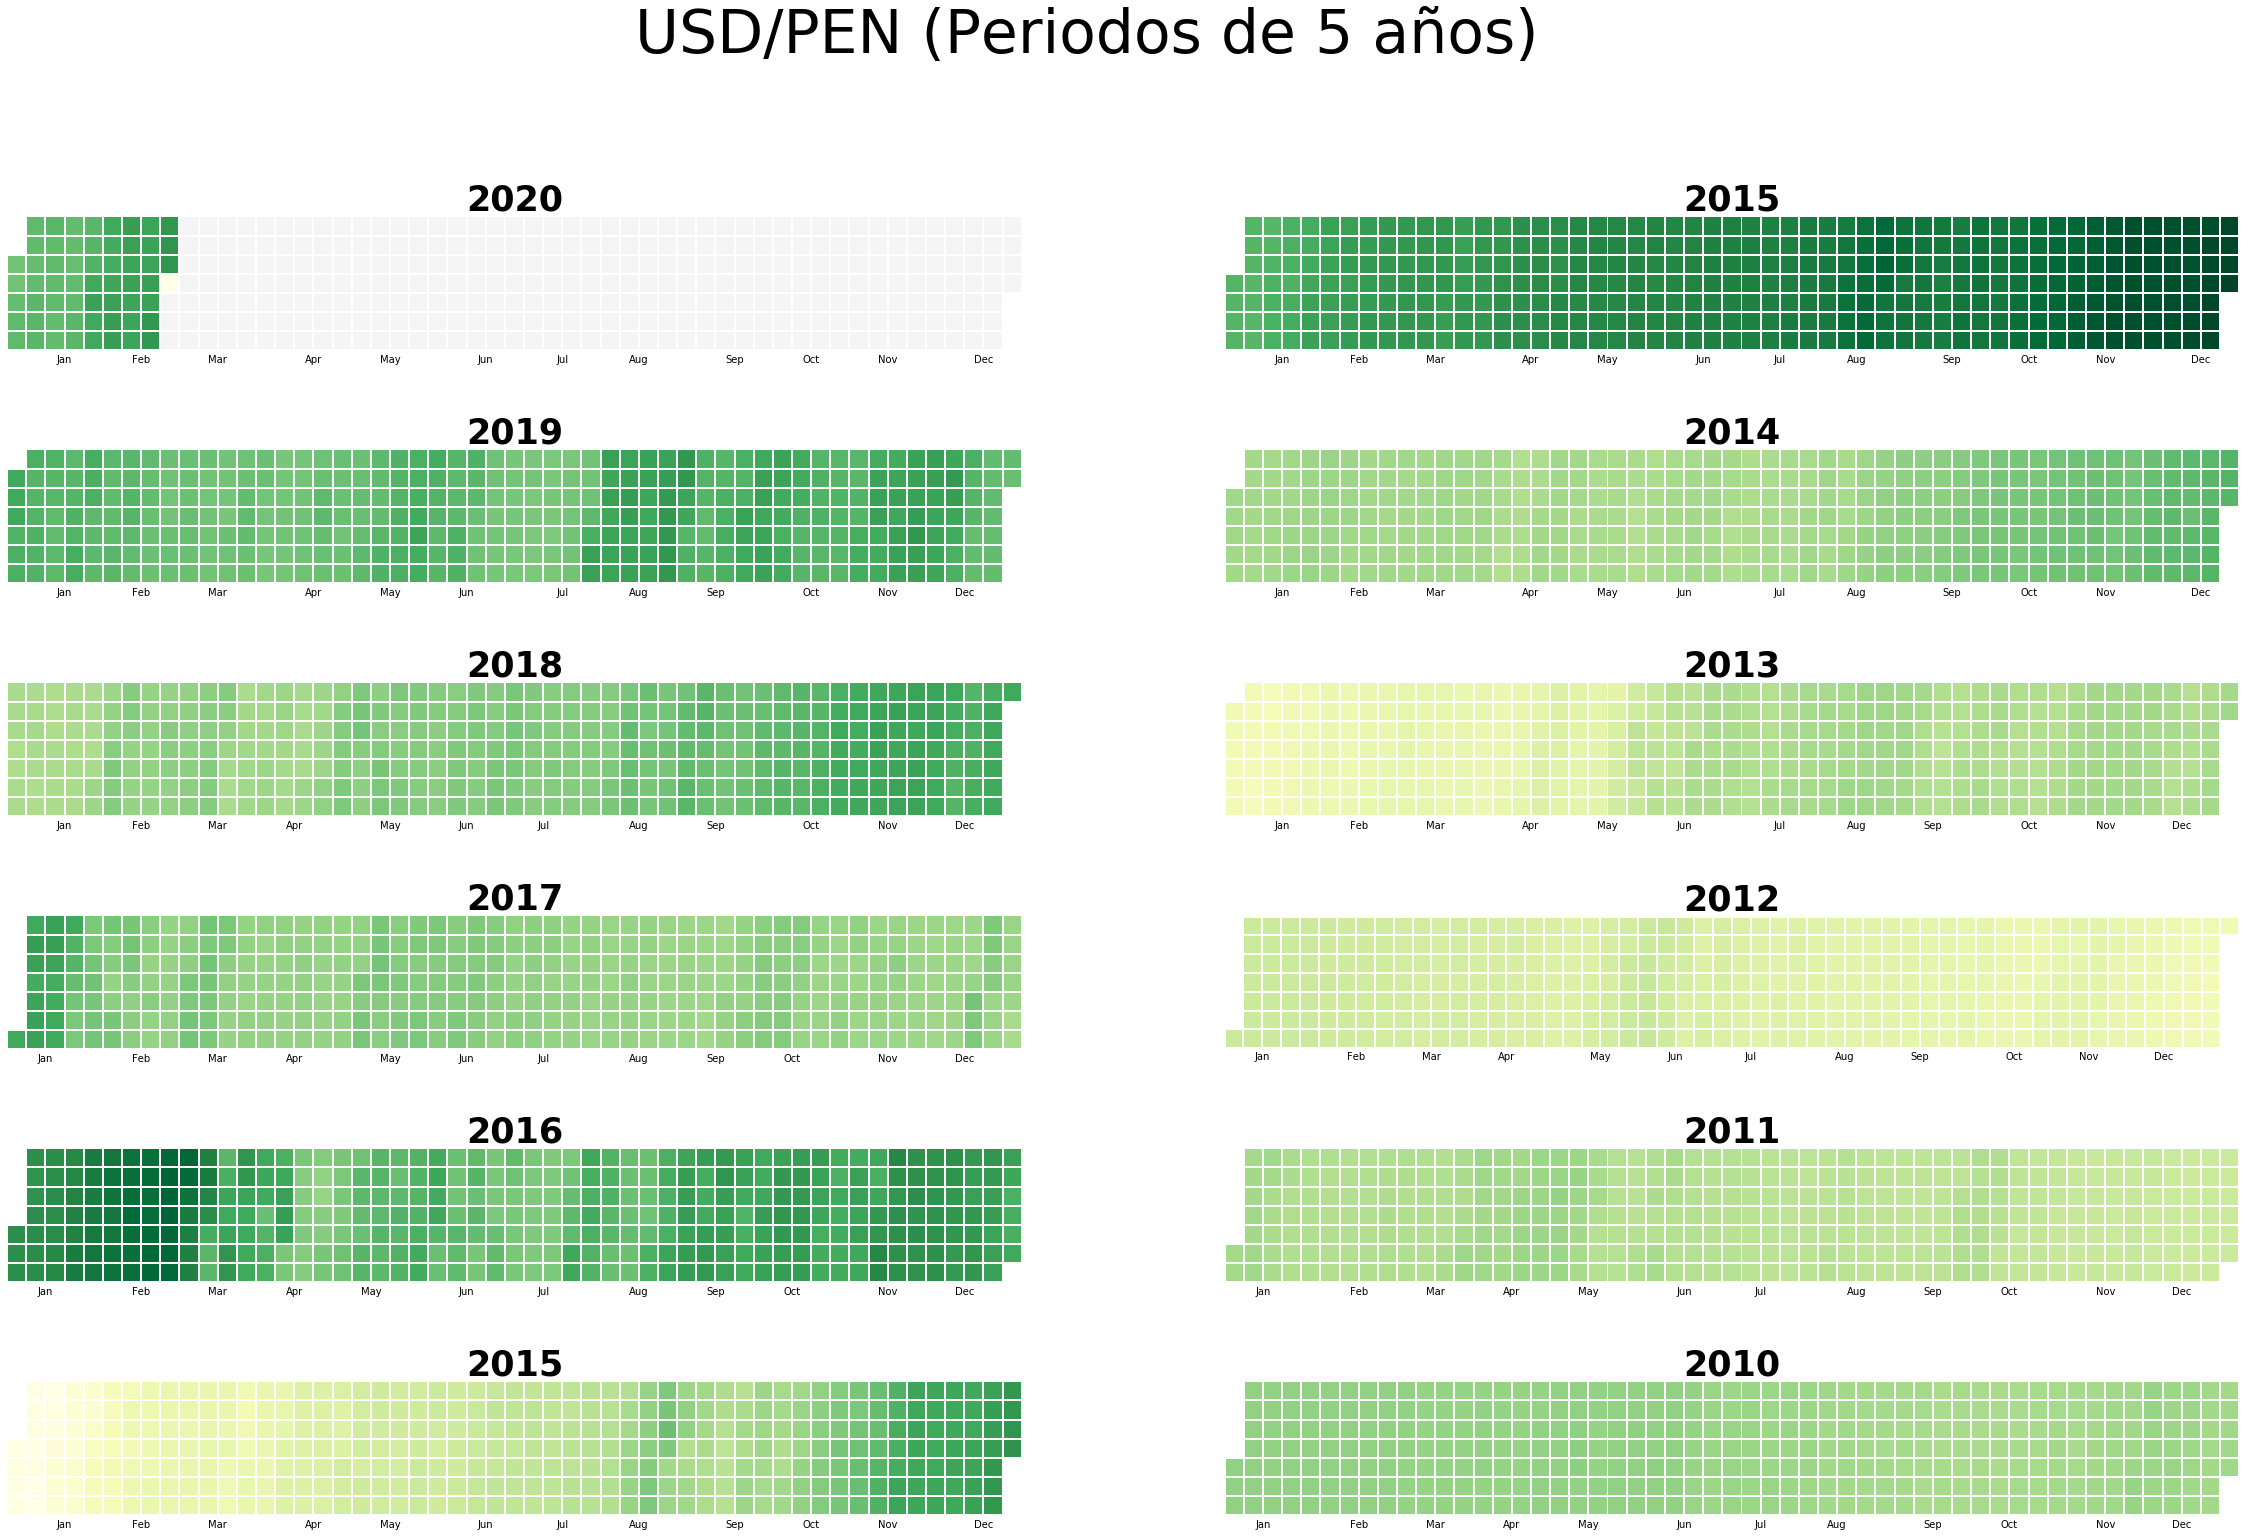

In [42]:
### Comparing trought five years. 

fig, axes = plt.subplots(nrows=6, ncols=2) 
axes0 = axes.T[0] #col1
for df,ax in zip(lista_20_15, axes0):
    calmap.yearplot(df,ax=ax,cmap= 'YlGn',dayticks=[], vmin= 2.98, vmax=3.60)
    ax.set_title(df.index.year.unique()[0],fontweight="bold", size=35)

axes1 = axes.T[1]
for df,ax in zip(lista_15_10, axes1):
    calmap.yearplot(df, ax=ax,cmap= 'YlGn',dayticks=[], vmin= 2.4, vmax=3.415)
    ax.set_title(df.index.year.unique()[0],fontweight="bold", size=35)
    #fig.colorbar(ax[0].get_children()[1], ax = ax.ravel().tolist())

fig.set_figheight(25)
fig.set_figwidth(40)
fig.suptitle('USD/PEN (Periodos de 5 años)', fontsize=60)

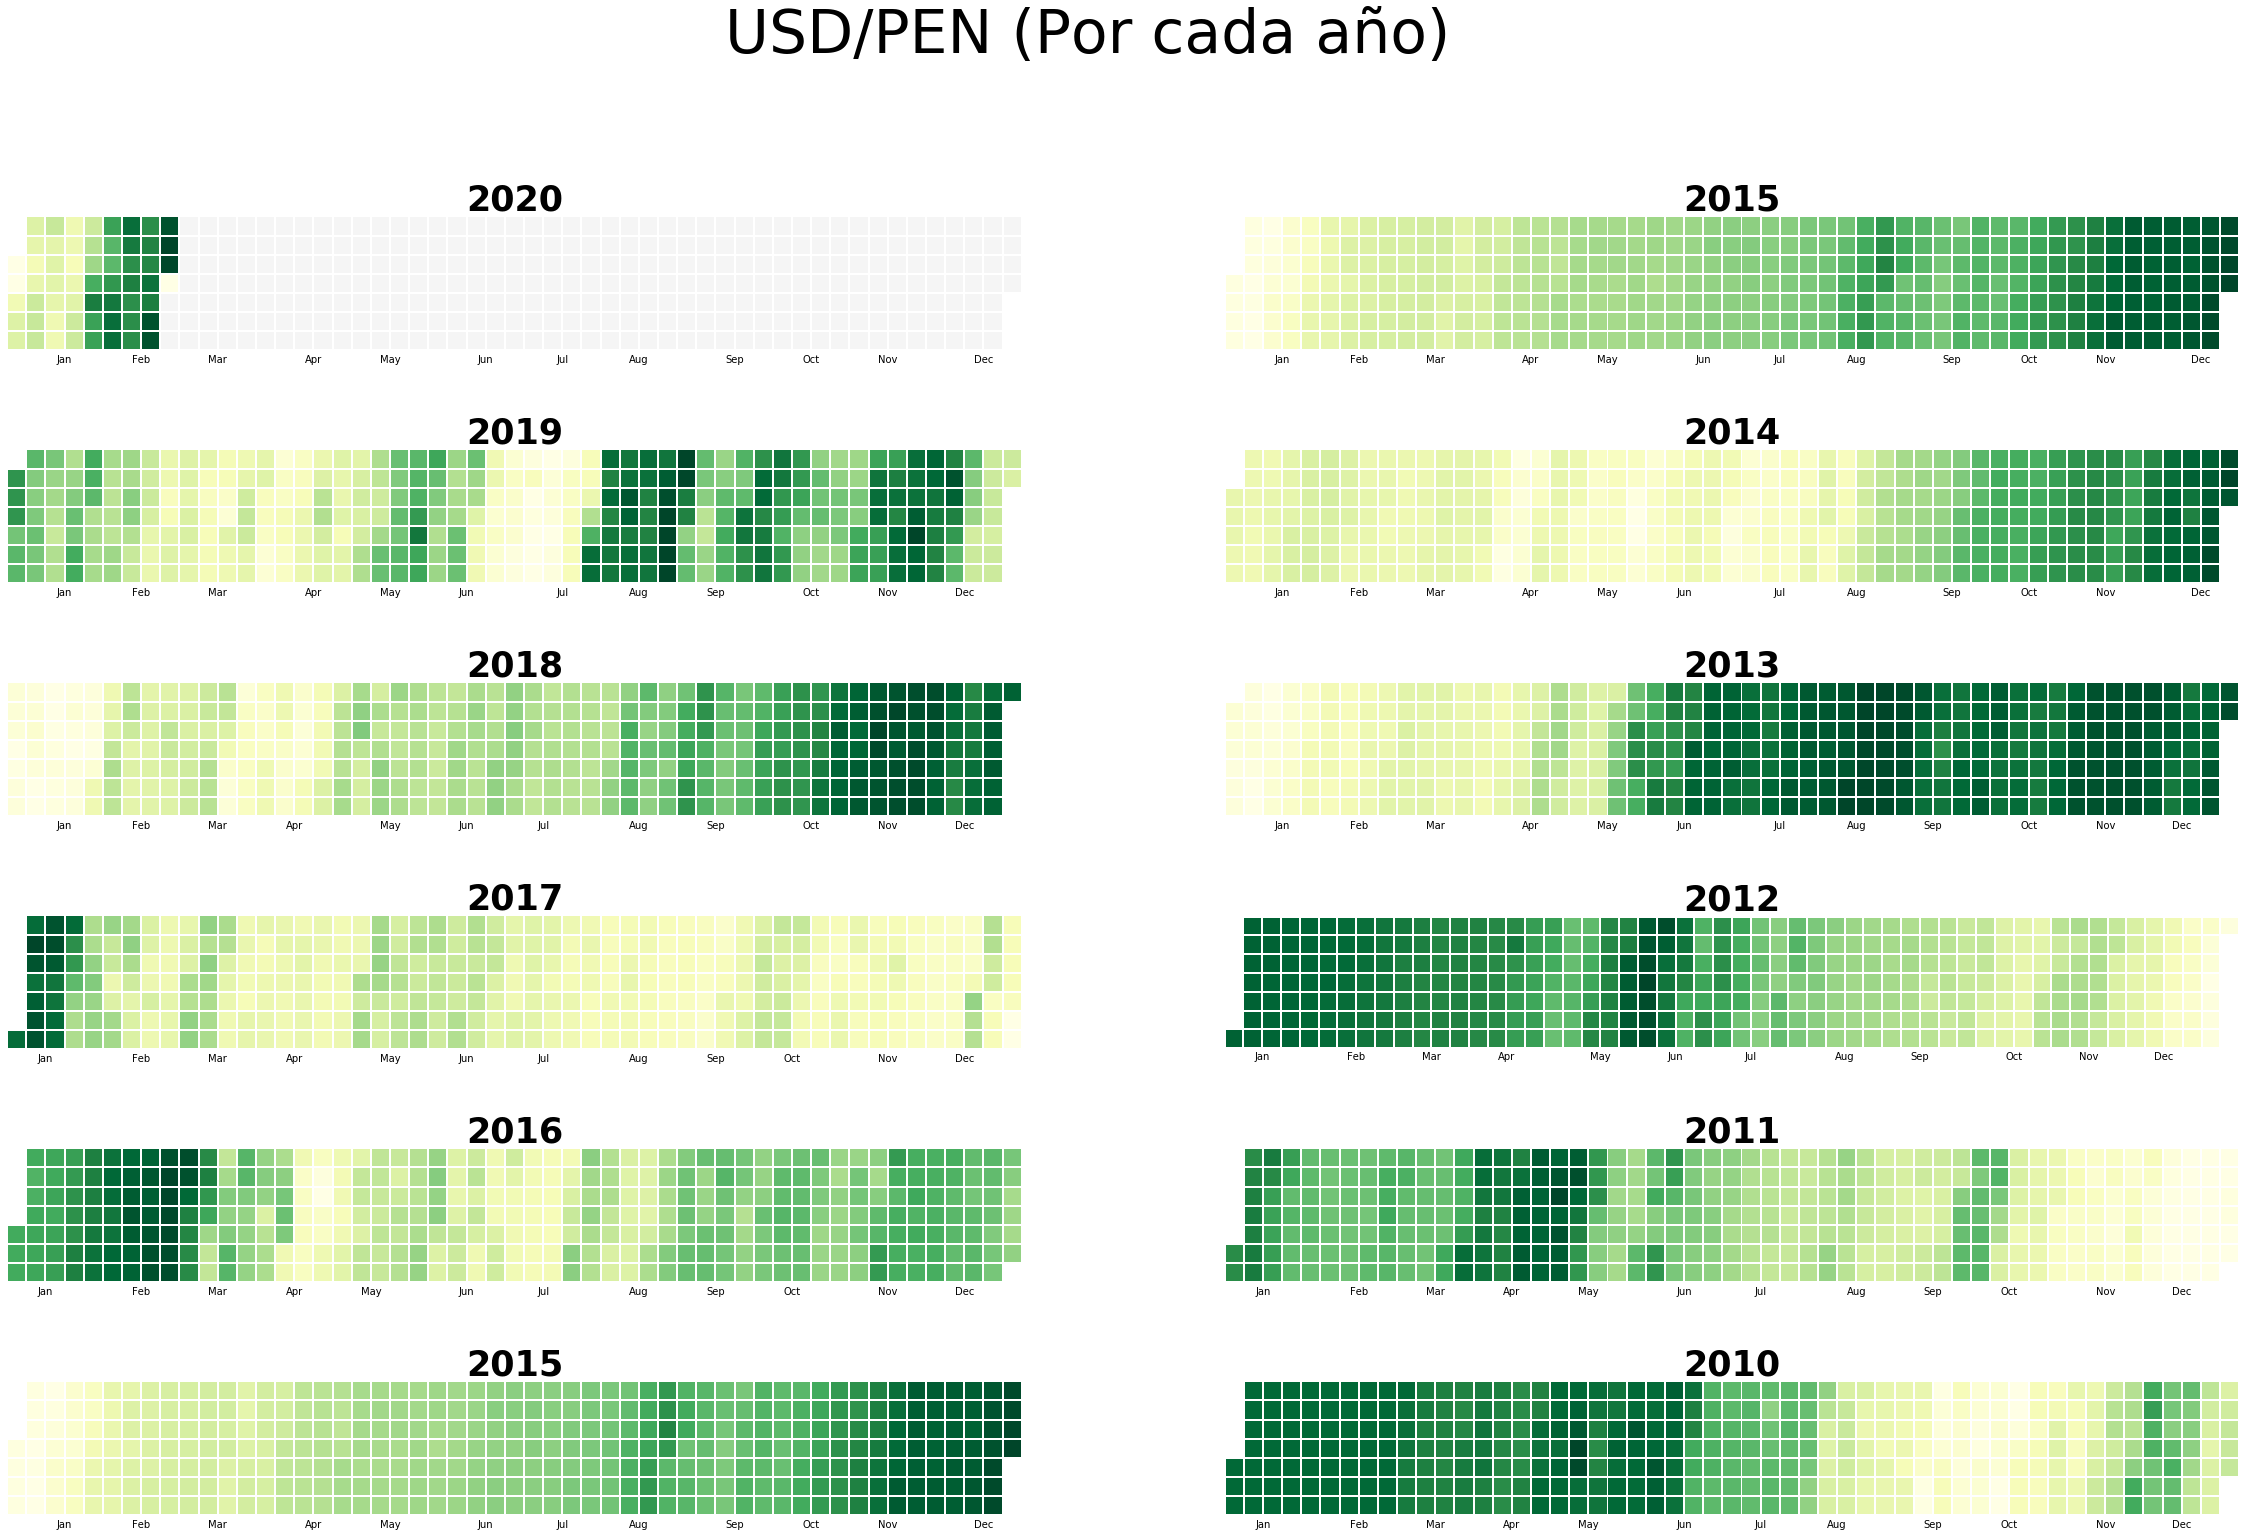

In [43]:
#Comparing each year (value limits on the same year.)
fig, axes = plt.subplots(nrows=6, ncols=2) #Defino mi grafico màs grande
axes0 = axes.T[0] #col1
for df,ax in zip(lista_20_15, axes0):
    calmap.yearplot(df,ax=ax,cmap= 'YlGn',dayticks=[], vmin= df.min(), vmax=df.max())
    ax.set_title(df.index.year.unique()[0],fontweight="bold", size=35)

axes1 = axes.T[1]
for df,ax in zip(lista_15_10, axes1):
    calmap.yearplot(df, ax=ax,cmap= 'YlGn',dayticks=[], vmin= df.min(), vmax=df.max())
    ax.set_title(df.index.year.unique()[0],fontweight="bold", size=35)
    #fig.colorbar(ax[0].get_children()[1], ax = ax.ravel().tolist())

fig.set_figheight(25)
fig.set_figwidth(40)
fig.suptitle('USD/PEN (Por cada año)', fontsize=60)

## Garbage code and testing (for reciclying purposes) 

In [ ]:
import calmap
import warnings
warnings.filterwarnings('ignore')
import numpy as np 

fig,ax  = calmap.calendarplot(data['TC'], fillcolor='gray',cmap= 'RdYlGn',linewidth=0, vmin=2.80, vmax=3.51, fig_kws=dict(figsize=(56,18)), yearascending=False,
                              dayticks=[])

#fig.colorbar()
fig.suptitle('Calendar view',fontsize=20, y=1.08)
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

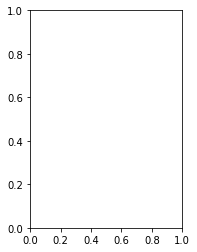

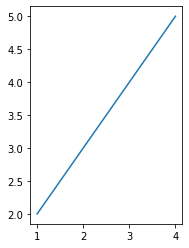

In [279]:
fig, axes = plt.subplots(nrows=6, ncols=2) #Defino mi grafico màs grande
axes0 = axes.T[0] #Estoy seleccionando solo la col1
for df,ax in zip(lista_20_15, axes0):
    calmap.yearplot(np.exp(df),ax=ax,cmap= 'YlGn',dayticks=[])
    ax.set_title(df.index.year.unique()[0],fontweight="bold", size=35)

axes1 = axes.T[1]
for df,ax in zip(lista_15_10, axes1):
    calmap.yearplot(np.exp(df), ax=ax,cmap= 'YlGn',dayticks=[])
    ax.set_title(df.index.year.unique()[0],fontweight="bold", size=35)
    #fig.colorbar(ax[0].get_children()[1], ax = ax.ravel().tolist())

fig.set_figheight(25)
fig.set_figwidth(40)

In [258]:
type(data_10_15)

pandas.core.frame.DataFrame

In [ ]:
#Intentando mezclar dos calendarplots: 

fig, ax = calmap.calendarplot()

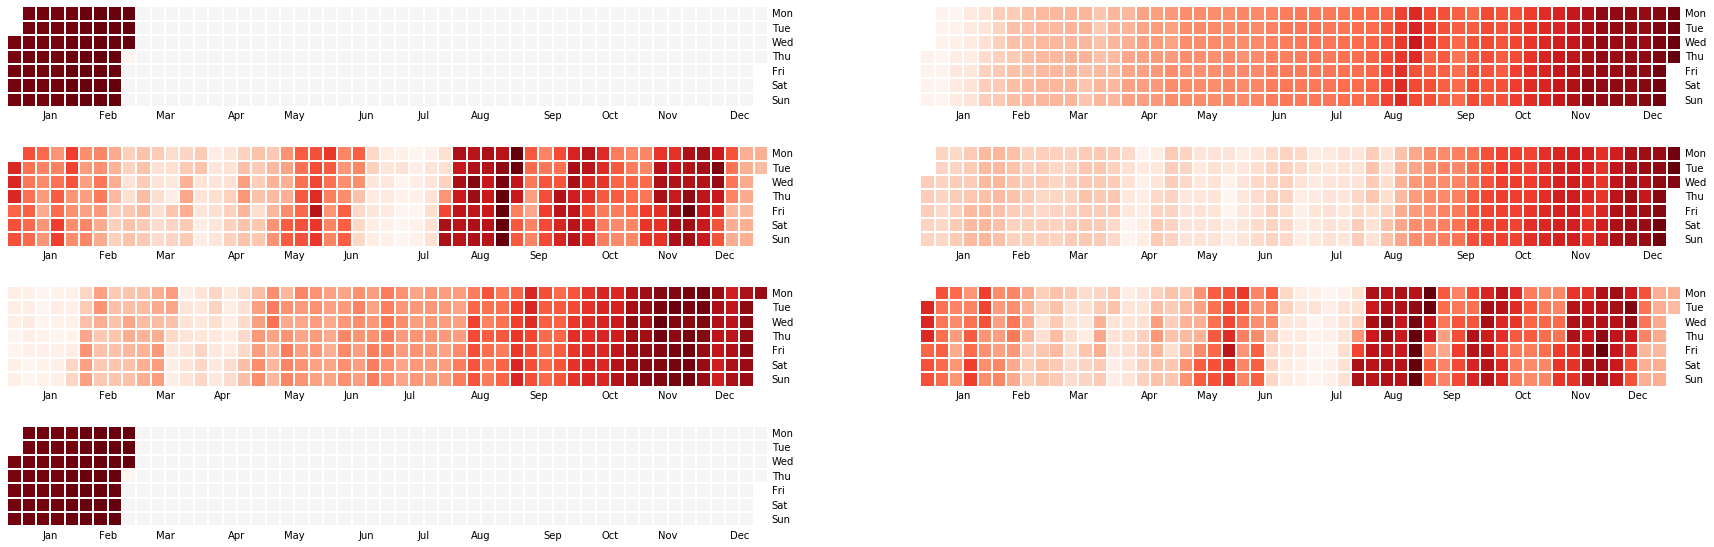

In [68]:
fig = plt.figure(figsize=(30,15))

ax = fig.add_subplot(6,2,1)

calmap.yearplot(lista_15_20[5],year=2020)

ax_2 = fig.add_subplot(6,2,2)

calmap.yearplot(lista_10_15[5])

ax_3 = fig.add_subplot(6,2,3)

calmap.yearplot(lista_15_20[4])

ax_4 = fig.add_subplot(6,2,4)

calmap.yearplot(lista_10_15[4])

ax_5 = fig.add_subplot(6,2,5)

calmap.yearplot(lista_15_20[3])

ax_6 = fig.add_subplot(6,2,6)

calmap.yearplot(lista_15_20[4])

ax_7 = fig.add_subplot(6,2,7)

calmap.yearplot(lista_15_20[5])

Text(0.5, 1.0, '2014')

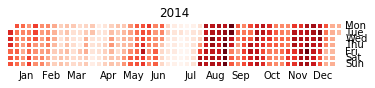

In [224]:
axes = calmap.yearplot(lista_15_20[4])
axes.set_title('2014')

In [219]:
import matplotlib
help(matplotlib.axes._subplots)

Help on module matplotlib.axes._subplots in matplotlib.axes:

NAME
    matplotlib.axes._subplots

CLASSES
    builtins.object
        SubplotBase
            AxesSubplot(SubplotBase, matplotlib.axes._axes.Axes)
    
    Subplot = class AxesSubplot(SubplotBase, matplotlib.axes._axes.Axes)
     |  Subplot(fig, *args, **kwargs)
     |  
     |  Base class for subplots, which are :class:`Axes` instances with
     |  additional methods to facilitate generating and manipulating a set
     |  of :class:`Axes` within a figure.
     |  
     |  Method resolution order:
     |      AxesSubplot
     |      SubplotBase
     |      matplotlib.axes._axes.Axes
     |      matplotlib.axes._base._AxesBase
     |      matplotlib.artist.Artist
     |      builtins.object
     |  
     |  Methods inherited from SubplotBase:
     |  
     |  __init__(self, fig, *args, **kwargs)
     |      *fig* is a :class:`matplotlib.figure.Figure` instance.
     |      
     |      *args* is the tuple (*numRows*, *numCo

In [42]:
[x for x in range(1,16,2)]

[1, 3, 5, 7, 9, 11, 13, 15]

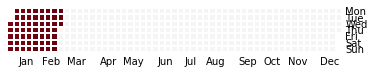

In [31]:
calmap.yearplot(data_2020.set_index('Fecha')['TC'])

#### Gráfico separado por variaciones en 5 años:


In [0]:
data = data.reset_index()

In [0]:
data_15_20 = data[data.Fecha.dt.year > 2014]
data_10_15 = data[data.Fecha.dt.year < 2015]

In [0]:
data = data.set_index('Fecha')

AttributeError: ignored

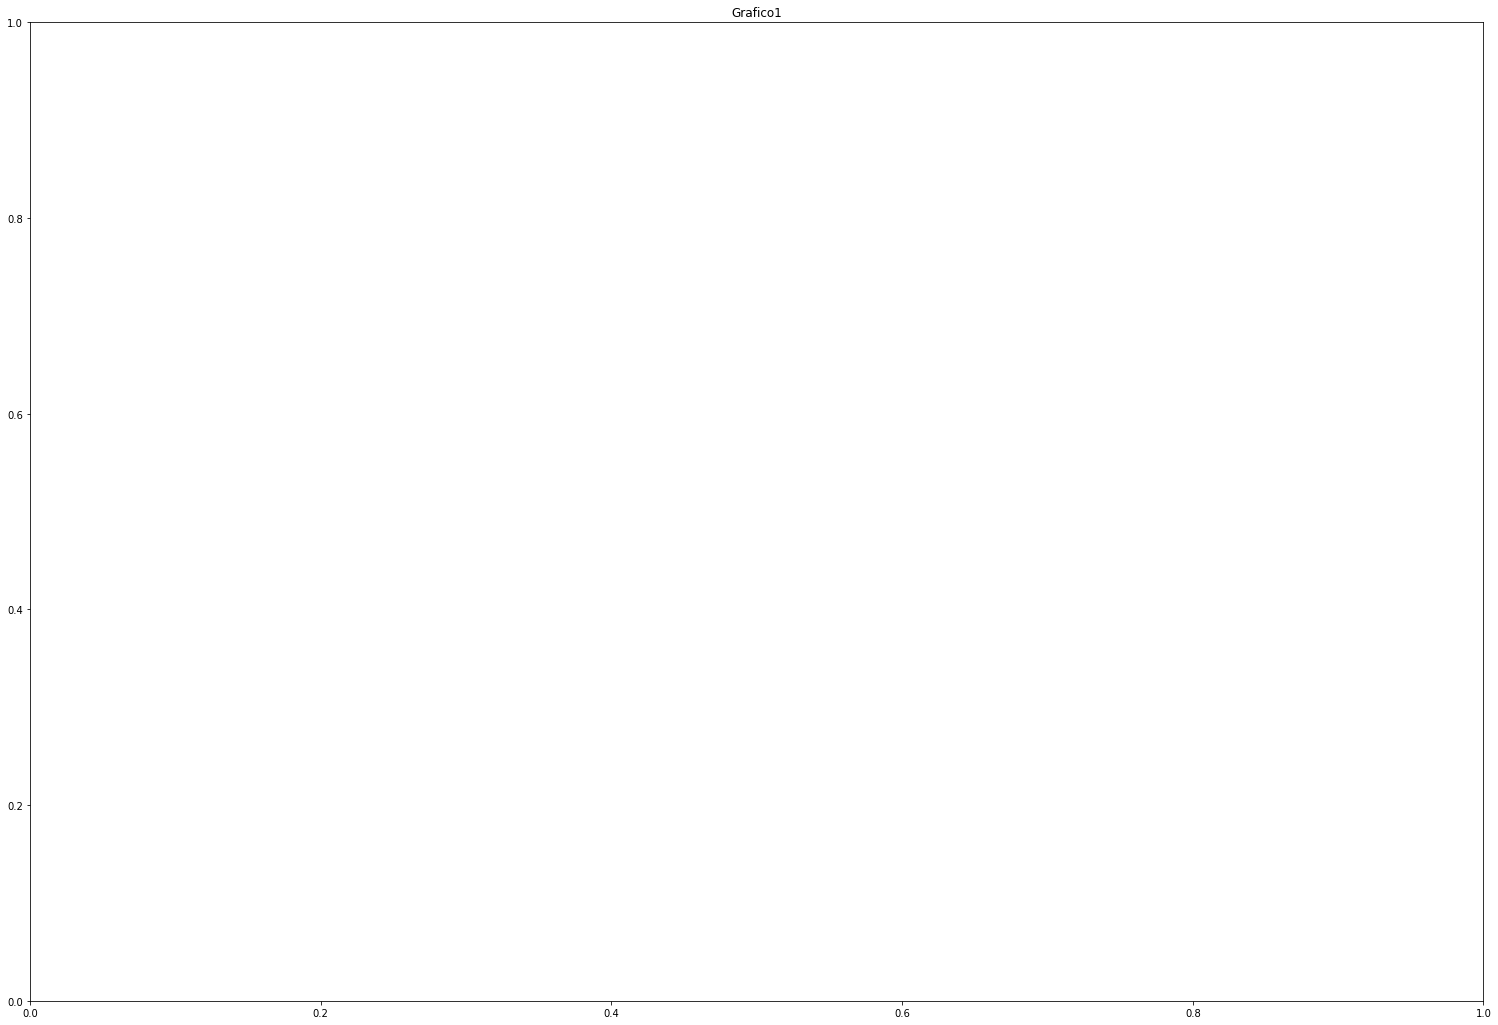

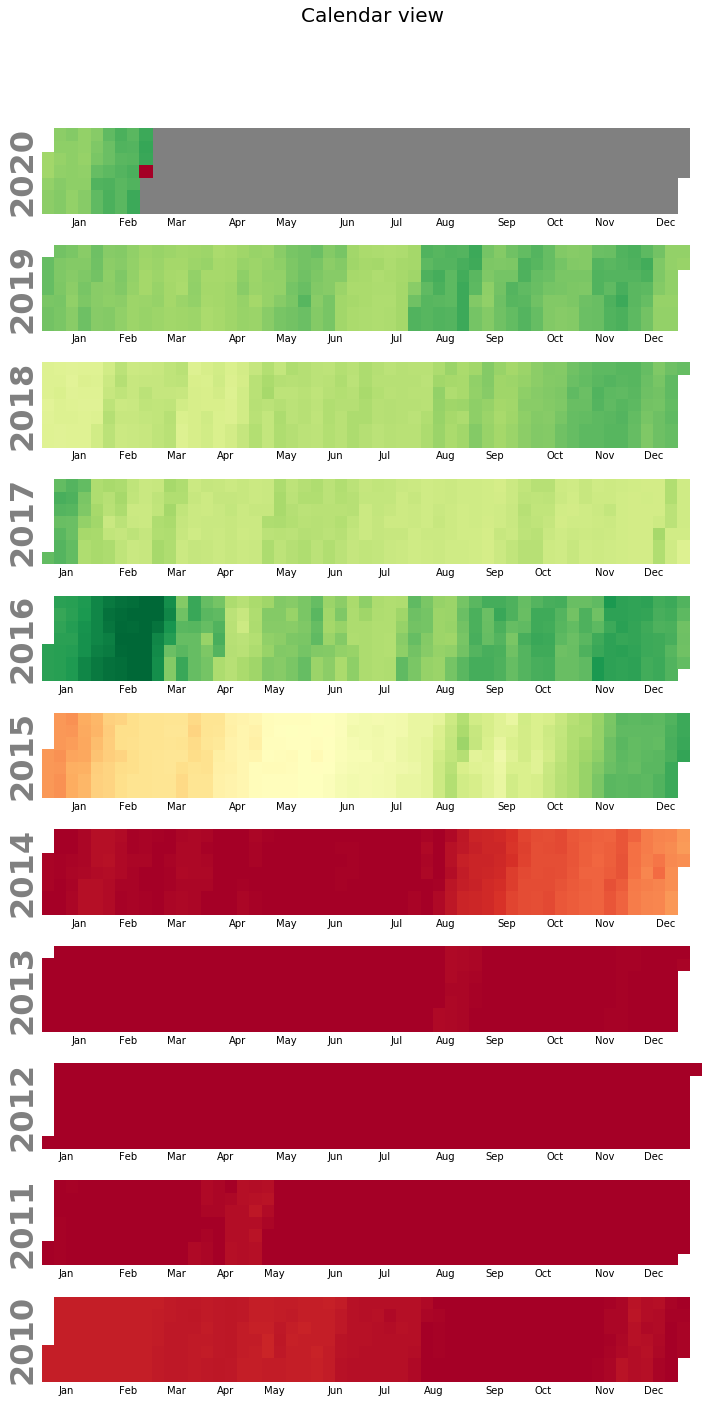

In [184]:
fig = plt.figure(figsize = (56,18))
fig.subplots_adjust(hspace=0.6, wspace=0.15)
ax_1 = fig.add_subplot(1,2,1)
fig1,ax1  = calmap.calendarplot(data['TC'], fillcolor='gray',cmap= 'RdYlGn',linewidth=0, vmin=2.80, vmax=3.51, fig_kws=dict(figsize=(28,18)), yearascending=False,
                              dayticks=[])
#fig.colorbar()
fig1.suptitle('Calendar view',fontsize=20, y=1.08)
fig1.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())
ax_1.set_title('Grafico1')
ax_2 = fig.add_sublot(1,2,2)
fig2, ax2 = calmap.calendarplot(data['TC'], fillcolor='gray',cmap= 'RdYlGn',linewidth=0, vmin=2.80, vmax=3.51, fig_kws=dict(figsize=(28,18)), yearascending=False,
                              dayticks=[])
ax2.set_title('Grafico2')
fig2.suptitle('Calendar view',fontsize=20, y=1.08)
fig2.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())


AttributeError: 'Line2D' object has no attribute 'get_array'

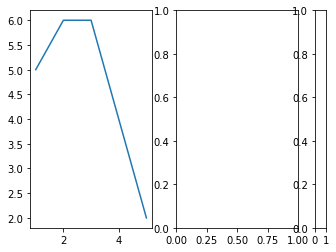

In [209]:
fig, ax = plt.subplots(ncols=2,nrows=1)
ax[0].plot([1,2,3,4,5],[5,6,6,4,2])
fig.colorbar(ax[0].get_children()[0],ax=ax.ravel())

ax[1].plot([0,0,2,4],[1,2,3,4])

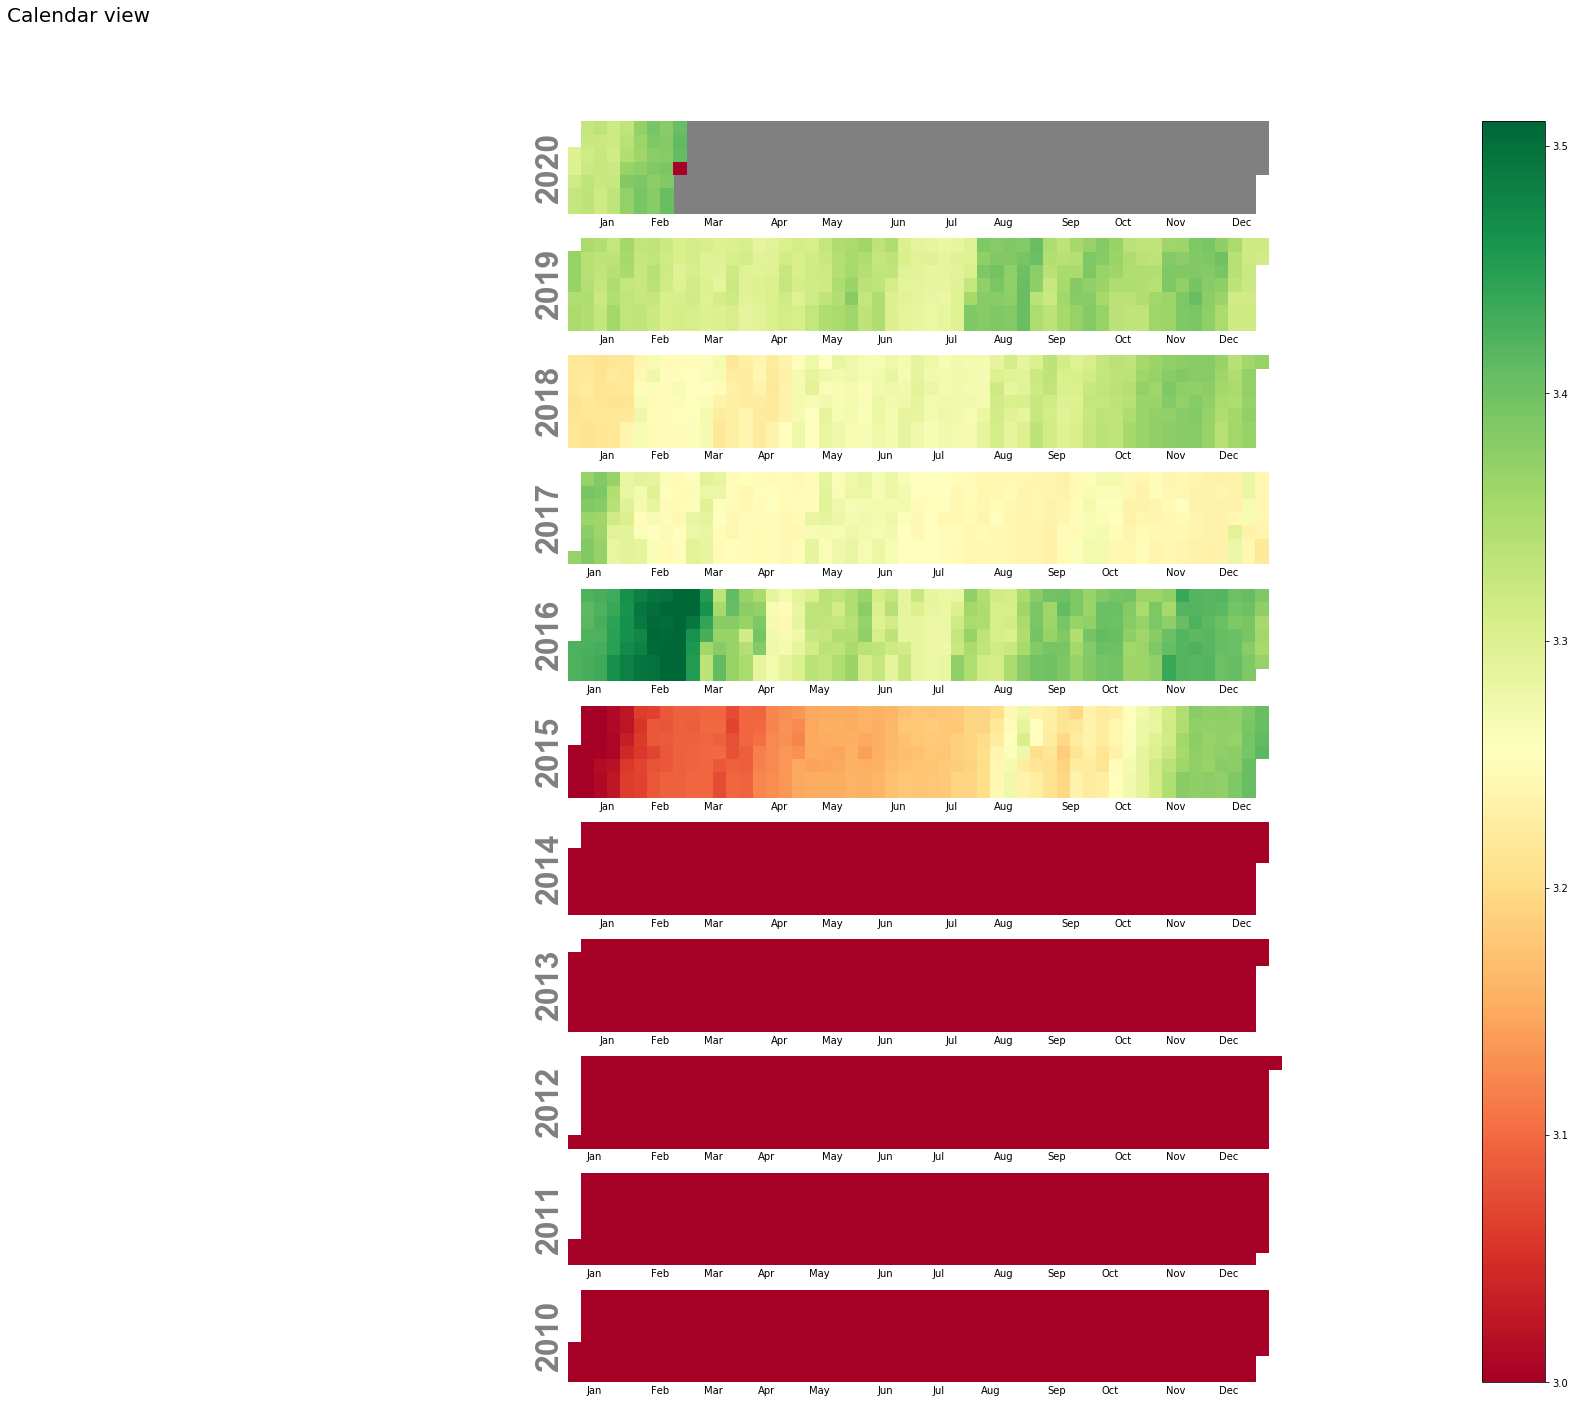

In [40]:
fig,ax  = calmap.calendarplot(data['TC'], fillcolor='gray',cmap= 'RdYlGn',linewidth=0, vmin=3.00, vmax=3.51, fig_kws=dict(figsize=(56,18)), yearascending=False,
                              dayticks=[])

#fig.colorbar()
fig.suptitle('Calendar view',fontsize=20, y=1.08)
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

In [0]:
all_days = pd.date_range('1/15/2014', periods=700, freq='D')
days = np.random.choice(all_days, 500)
events = pd.Series(np.random.randn(len(days)), index=days)